<a href="https://colab.research.google.com/github/luckwell4869/Portfolio/blob/main/Python%20Machine%20Learning/chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##回帰分析

*  線形回帰
>*  単線形回帰
>*  重回帰分析
*  Housingデータセットの探索
>*  Housingデータセットをデータフレームに読み込む
>*  データセットの重要な特性を可視化する
>*  相関行列を使って関係を調べる
*  最小二乗線形回帰モデルの実装
>*  勾配降下法を使って回帰パラメータの回帰を解く
>*  scikit-learnを使って回帰モデルの係数を推定する
*  RANSACを使ったロバスト回帰モデルの学習
*  線形回帰モデルの性能評価
*  回帰に正則化手法を使う
*  多項式回帰：線形回帰モデルから曲線を見出す
>*  scikit-learnを使って多項式の項を追加する
>*  Housingデータセットで非線形関係をモデル化する
>*  ランダムフォレストを使って非線形関係に対処する
*  まとめ

線形回帰：訓練データを通過する直線(平面、超平面)のうち最も適合するものを見つけ出すこと



In [12]:
#Housingデータセットの読み込み
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

# 1. CRIM      per capita crime rate by town
# 2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
# 3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
# 5. NOX       nitric oxides concentration (parts per 10 million)
# 6. RM        average number of rooms per dwelling
# 7. AGE       proportion of owner-occupied units built prior to 1940
# 8. DIS       weighted distances to five Boston employment centres
# 9. RAD       index of accessibility to radial highways
# 10. TAX      full-value property-tax rate per $10,000
# 11. PTRATIO  pupil-teacher ratio by town
# 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
# 13. LSTAT    % lower status of the population
# 14. MEDV     Median value of owner-occupied homes in $1000s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
# pip install mlxtend

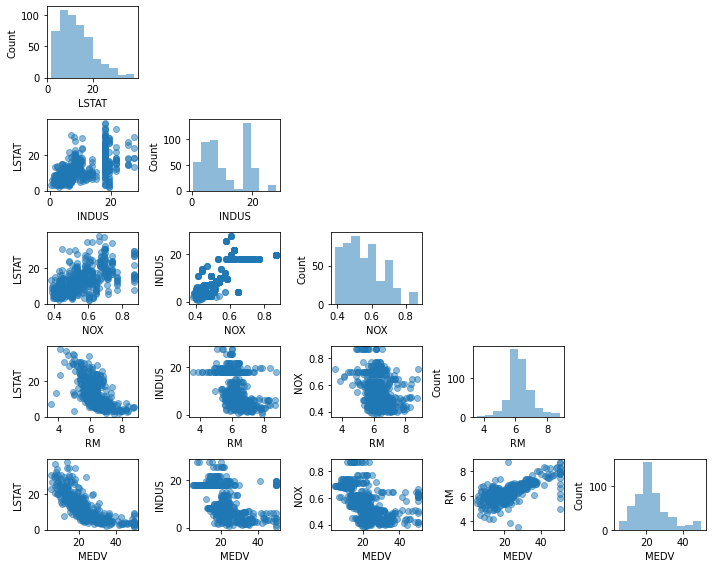

In [14]:
#散布図行列の描画
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
#変数のペアの関係をプロット
scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

対角成分にはヒストグラムが描画される。

非対角成分には横軸と縦軸の変数をとった散布図

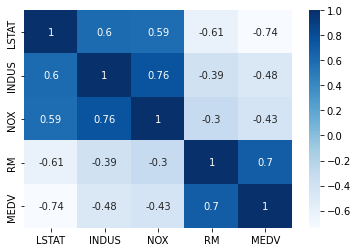

In [15]:
#相関行列の描画
import numpy as np
import seaborn as sns
# from mlxtend.plotting import heatmap
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols, cmap='Blues')
plt.show()

In [16]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

最小二乗法線形回帰を単位ステップ関数のないADALINE

In [34]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

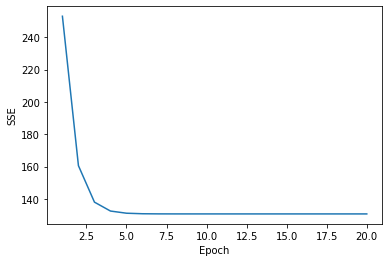

In [18]:
#コストをエポック数の関数として描画
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [19]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

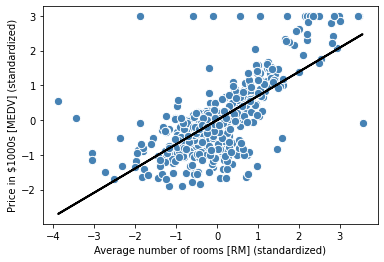

In [35]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [36]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

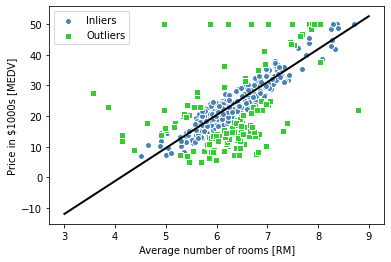

In [37]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

ロバスト回帰とは、外れ値の影響を抑えたうえで回帰を実行する手法の総称

つまり、外れ値を除去するのではなく、外れ値を含んだ状態で適切に学習することを目指す

In [21]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac= RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

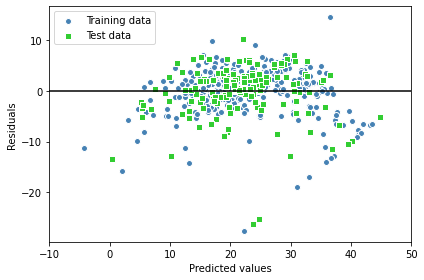

In [31]:
#残差プロットの描画
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()